### 3 Analyse exploratoire des données

### 3.1 Statistiques descriptives

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
df = pd.read_csv('stats_data.csv', sep=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479031 entries, 0 to 479030
Data columns (total 47 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   place         479031 non-null  int64  
 1   catu          479031 non-null  int64  
 2   grav          479031 non-null  int64  
 3   sexe          479031 non-null  int64  
 4   an_nais       479031 non-null  float64
 5   trajet        479031 non-null  int64  
 6   secu1         479031 non-null  int64  
 7   secu2         479031 non-null  int64  
 8   secu3         479031 non-null  int64  
 9   locp          479031 non-null  int64  
 10  actp          479031 non-null  int64  
 11  etatp         479031 non-null  int64  
 12  senc          479031 non-null  int64  
 13  catv          479031 non-null  int64  
 14  obs           479031 non-null  int64  
 15  obsm          479031 non-null  int64  
 16  choc          479031 non-null  int64  
 17  manv          479031 non-null  int64  
 18  moto

In [4]:
#on va travailler avec un autre dataframe df1 pour l'analyse statistisque des données
df1=df

In [6]:
# Convertir les colonnes 'jour', 'mois', 'an' en une colonne 'date'
df1['date'] = pd.to_datetime(df1[['an', 'mois', 'jour']].rename(columns={'an': 'year', 'mois': 'month', 'jour': 'day'}))


In [7]:
# Extraire le nom du jour de la semaine
df1['jour_de_la_semaine'] = df1['date'].dt.day_name()

In [8]:
# Créez le dictionnaire de mapping
mois_mapping = {
    1: 'Janvier', 2: 'Février', 3: 'Mars', 4: 'Avril',
    5: 'Mai', 6: 'Juin', 7: 'Juillet', 8: 'Août',
    9: 'Septembre', 10: 'Octobre', 11: 'Novembre', 12: 'Décembre'
}

# Appliquez le mapping à la colonne 'mois'
df1['mois'] = df1['mois'].replace(mois_mapping)

In [9]:
df1

,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,...,int,atm,col,lat,long,hrmn_radians,heure_sin,heure_cos,date,jour_de_la_semaine
0,2,2,2,2,2002.0,0,1,0,-1,-1,...,1,1,2,48.896210,2.470120,0.392699,0.382683,0.923880,2019-11-30,Saturday
1,1,1,2,2,1993.0,5,1,0,-1,-1,...,1,1,2,48.896210,2.470120,0.392699,0.382683,0.923880,2019-11-30,Saturday
2,1,1,1,1,1959.0,0,1,0,-1,-1,...,1,1,2,48.896210,2.470120,0.392699,0.382683,0.923880,2019-11-30,Saturday
3,1,1,2,2,1994.0,0,1,0,-1,-1,...,1,1,6,48.930700,2.368800,0.741765,0.675590,0.737277,2019-11-30,Saturday
4,1,1,1,1,1996.0,0,1,0,-1,-1,...,1,1,4,48.935872,2.319174,3.992441,-0.751840,-0.659346,2019-11-28,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479026,1,1,1,2,2002.0,5,1,-1,-1,0,...,3,1,3,43.927265,1.915637,2.268928,0.766044,-0.642788,2022-01-01,Saturday
479027,8,2,3,2,2004.0,5,1,-1,-1,0,...,3,1,3,43.927265,1.915637,2.268928,0.766044,-0.642788,2022-01-01,Saturday
479028,1,1,2,2,1953.0,5,1,-1,-1,0,...,3,1,3,43.927265,1.915637,2.268928,0.766044,-0.642788,2022-01-01,Saturday
479029,1,1,3,1,1992.0,1,2,6,-1,-1,...,1,1,2,47.594404,1.353329,4.428773,-0.960050,-0.279829,2022-03-01,Tuesday


##### étude de la variable gravité 'grav'

In [23]:
# Analyse des fréquences de chaque classe
freq_table = df1['grav'].value_counts().reset_index()
freq_table.columns = ['Classe', 'Nombre']
print(freq_table)

   Classe  Nombre
0       2  108557
1       1  104182
2       3   35820
3       4    5342


Fréquence en de la répartition des classes de la variables grav (%)

In [11]:
df1['grav'].value_counts(normalize=True) * 100

1    41.502116
2    40.546854
3    15.346188
4     2.604842
Name: grav, dtype: float64

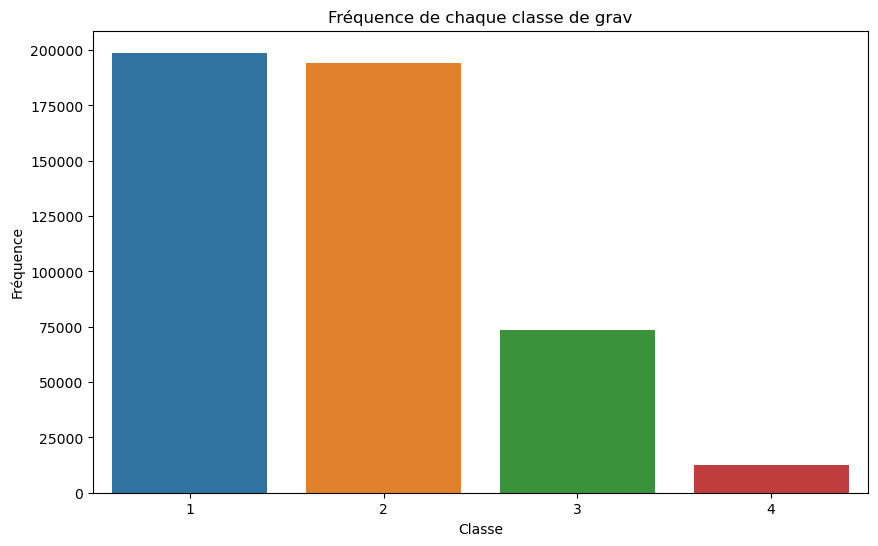

In [12]:
# Visualisation des fréquences de chaque classe
plt.figure(figsize=(10, 6))
sns.countplot(x='grav', data=df1)
plt.title('Fréquence de chaque classe de grav')
plt.xlabel('Classe')
plt.ylabel('Fréquence')
plt.show()

On voit qu'on a un déséquilibre des classes dans la variables gravité. Il y a beaucoup plus d'accident pour les catégorie 1 et 2, c'est à dire personnes indemnes et blésser légers

### 3.2 Visualisation des données

#### Variation des variables en fonction de la variables gravité

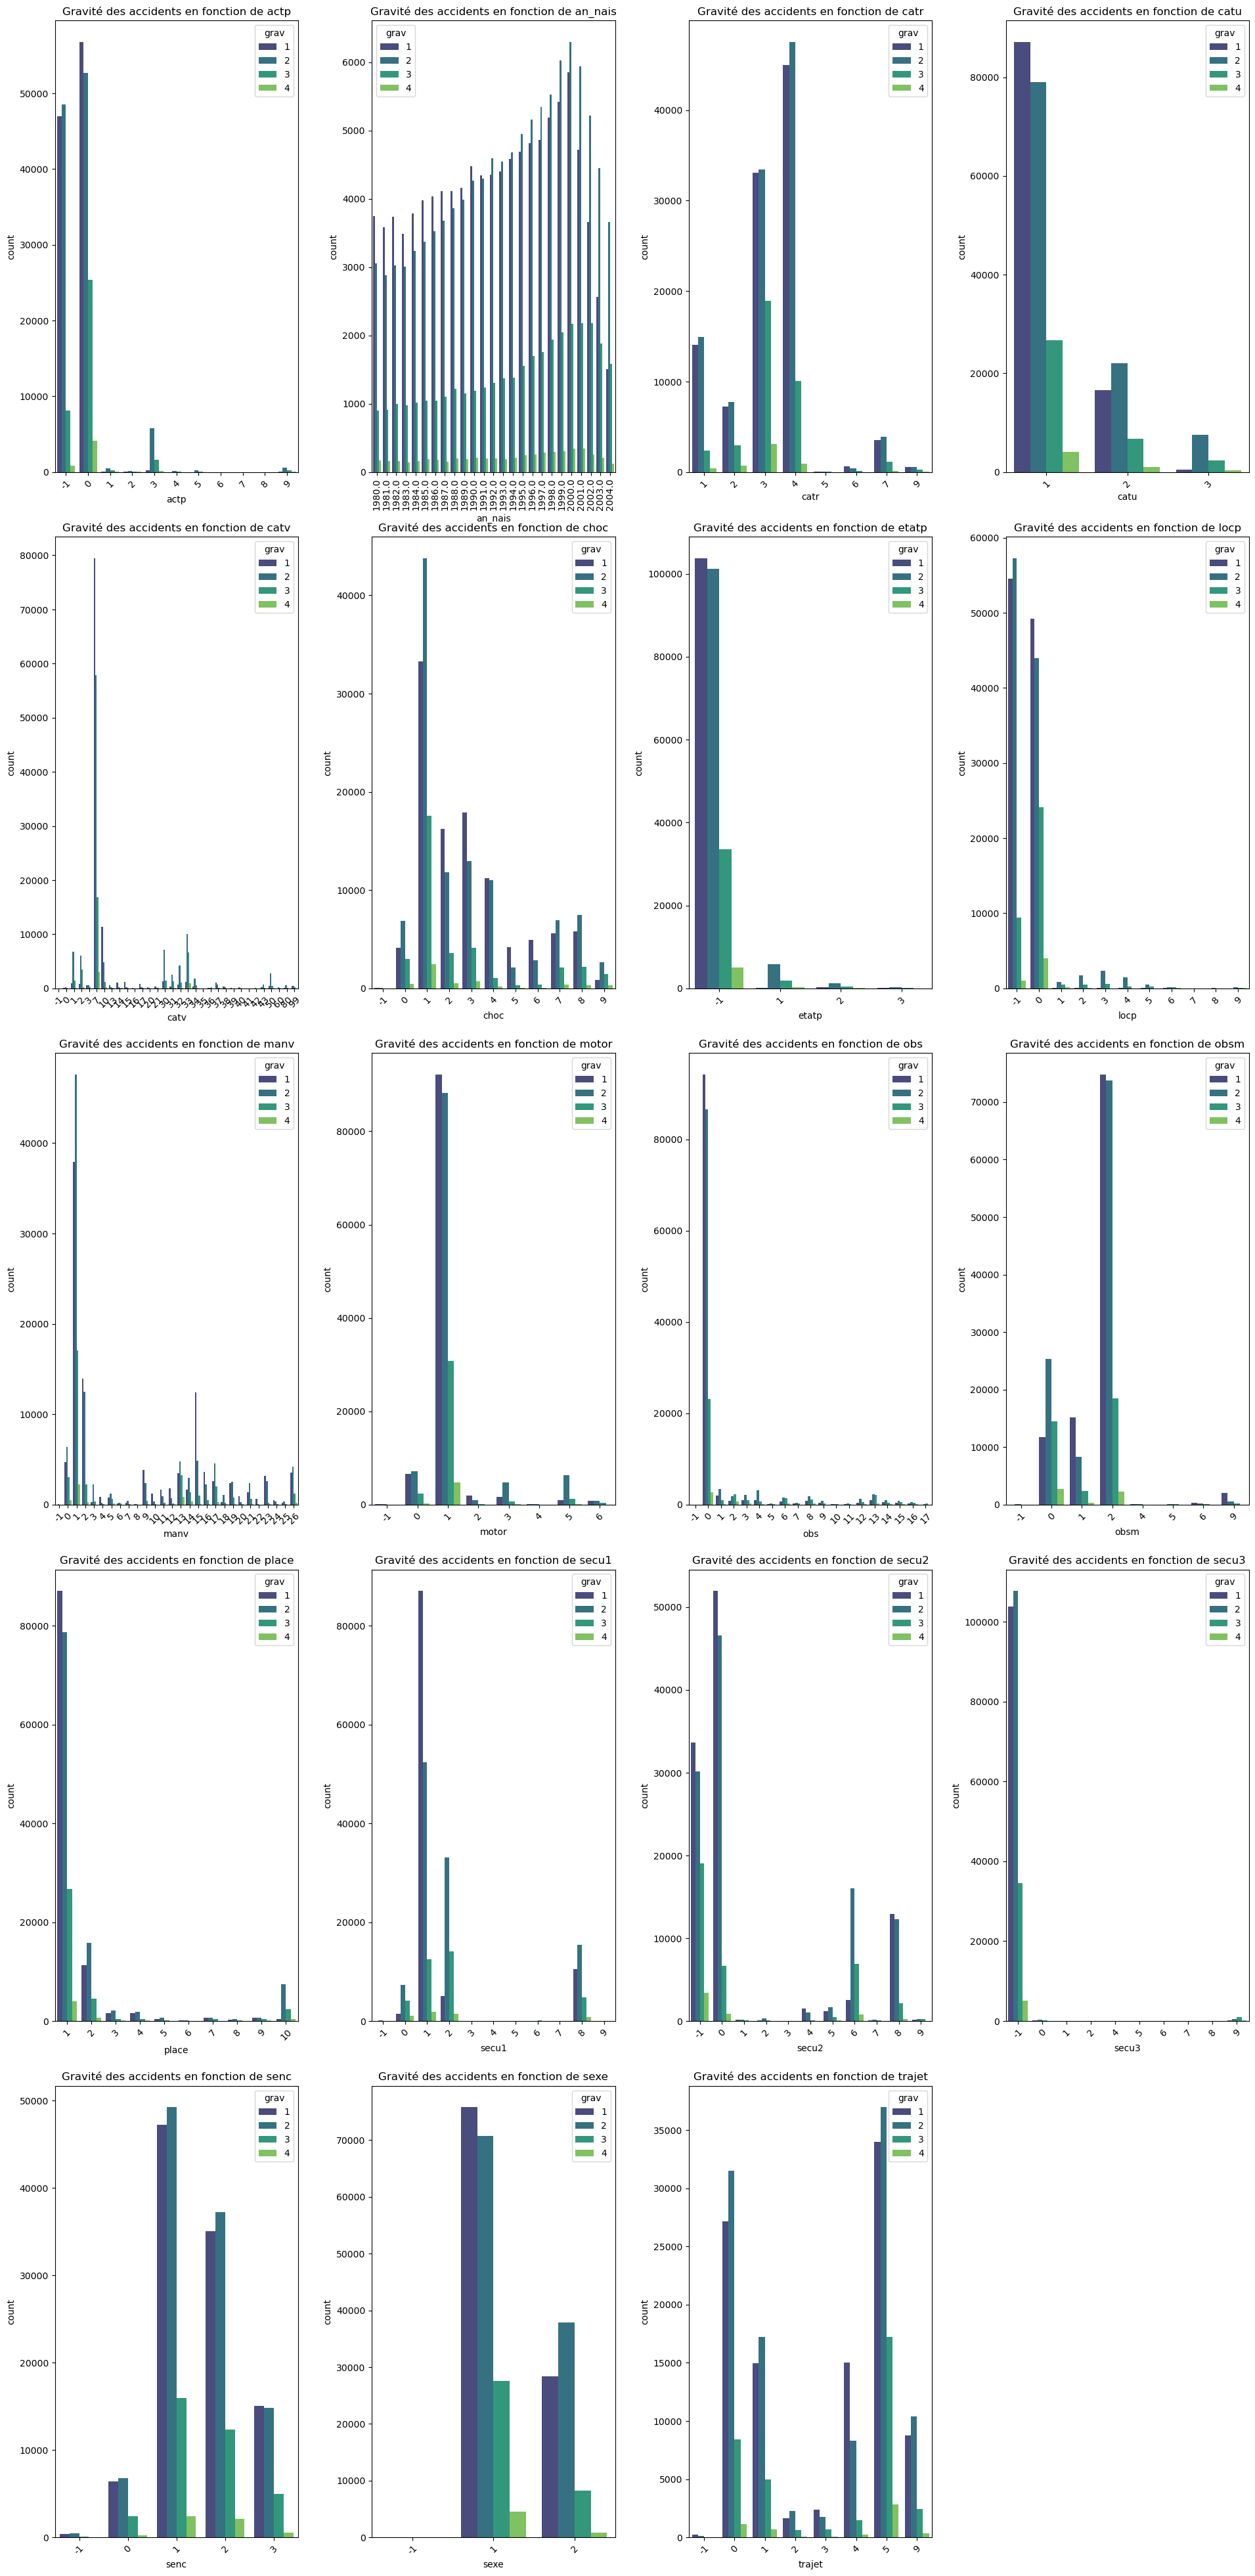

In [13]:

columns = df1.columns[:20].difference(['grav', 'mois', 'an', 'jour', 'lat', 'long'])

# Nombre de colonnes à tracer
num_columns = len(columns)

# Création de la figure avec des subplots
fig, axs = plt.subplots(nrows=(num_columns // 4) + 1, ncols=4, figsize=(20, 40))
fig.tight_layout(pad=5.0)
axs = axs.ravel()

df1=df[(df['an_nais'] >= 1980) & (df['an_nais'] <= 2004)]

# Boucle pour tracer les graphiques
for i, col in enumerate(columns):
    if col=='an_nais':
        sns.countplot(data=df1.sort_values(by=['jour', 'mois']), x=col, hue='grav', ax=axs[i], palette='viridis')
        axs[i].tick_params(axis='x', rotation=90)
        axs[i].set_title(f'Gravité des accidents en fonction de {col}', fontsize=12)
    else:
        sns.countplot(data=df1.sort_values(by=['jour', 'mois']), x=col, hue='grav', ax=axs[i], palette='viridis')
        axs[i].tick_params(axis='x', rotation=45)
        axs[i].set_title(f'Gravité des accidents en fonction de {col}', fontsize=12)
        
# Supprimer les axes inutilisés si le nombre de colonnes n'est pas multiple de 4
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.show()

##### Quelques interprétations des graphiques obtenus

Gravité des accidents en fonction de l'actp (Action du piéton) : La majorité des accidents graves impliquant des piétons se produisent lorsqu'ils sont masqués par un obstacle (actp 4). les catégorie 0 et 1 sont non renseignées.

Gravité des accidents en fonction de l'an_nais (Année de naissance) : Les personnes plus jeunes (an_nais dans les années récentes) semblent être plus souvent impliquées dans des accidents graves. Les graphes montrent une augmentation de la gravité des accidents avec les usagers plus jeunes, suggérant peut-être une prise de risque plus élevée ou une expérience moindre de la conduite.

Gravité des accidents en fonction de la catr (Catégorie de route) : Les accidents sur les routes  départementales (catégorie 3) tendent à être plus graves que que sur les autres catégories de routes.

Gravité des accidents en fonction de la catu (Catégorie d'usager) : Les conducteurs (catu 1) sont les plus souvent impliqués dans les accidents graves, suivis des passagers (catu 2) et des piétons (catu 3). 

Gravité des accidents en fonction de la catv (Catégorie de véhicule) : Les véhicules légers (VL) (catv 07) sont les plus souvent impliqués dans les accidents graves. 

Gravité des accidents en fonction du choc (Point de choc initial) : La majorité des accidents graves impliquent un choc à l’avant du véhicule (choc 1), ce qui est cohérent avec les situations de collision frontale.

Gravité des accidents en fonction de l'etalp (Etat de l'accident, lieu principal) : Les accidents graves se produisent principalement en dehors des intersections (etalp 1), indiquant que les intersections peuvent avoir des mesures de sécurité plus efficaces.

Gravité des accidents en fonction du locp (Localisation du piéton) : Les piétons heurtés à plus dans des zones sans objets (locp 0) sont plus gravement blessés, ce qui souligne l'importance de traverser aux endroits désignés.

Gravité des accidents en fonction du manv (Manoeuvre principale avant l’accident) : Les accidents les plus graves se produisent lorsque les véhicules se déplacent en ligne droite sans changement de direction (manv 1), souvent à des vitesses plus élevées.

Gravité des accidents en fonction du motor (Type de motorisation) : Les véhicules à motorisation hydrocarbure (motor 1) sont les plus souvent impliqués, reflétant leur prévalence sur les routes.

Gravité des accidents en fonction de l'obsm (Obstacle mobile heurté) : Les arbres (obsm 2) sont les obstacles  les plus souvent heurtés.

Gravité des accidents en fonction de la place (Place occupée dans le véhicule) : Les conducteurs (place 1) sont les plus souvent impliqués dans les accidents graves, suivis des passagers avant.

Gravité des accidents en fonction de secu1 (Utilisation de l’équipement de sécurité) : Les ceintures de sécurité sont les équipements les plus couramment utilisés, ce qui est crucial pour réduire la gravité des blessures.

Gravité des accidents en fonction du senc (Sens de circulation) : La majorité des accidents graves se produisent sur des routes à sens unique (senc 1).

Gravité des accidents en fonction du sexe (Sexe de l’usager) : Les hommes (sexe 1) sont plus souvent impliqués dans des accidents graves, ce qui pourrait refléter des différences de comportement ou de fréquence de conduite.

Gravité des accidents en fonction du trajet (Motif du déplacement) : Les trajets de promenade et loisir (trajet 5) sont les plus fréquemment impliqués dans des accidents graves.

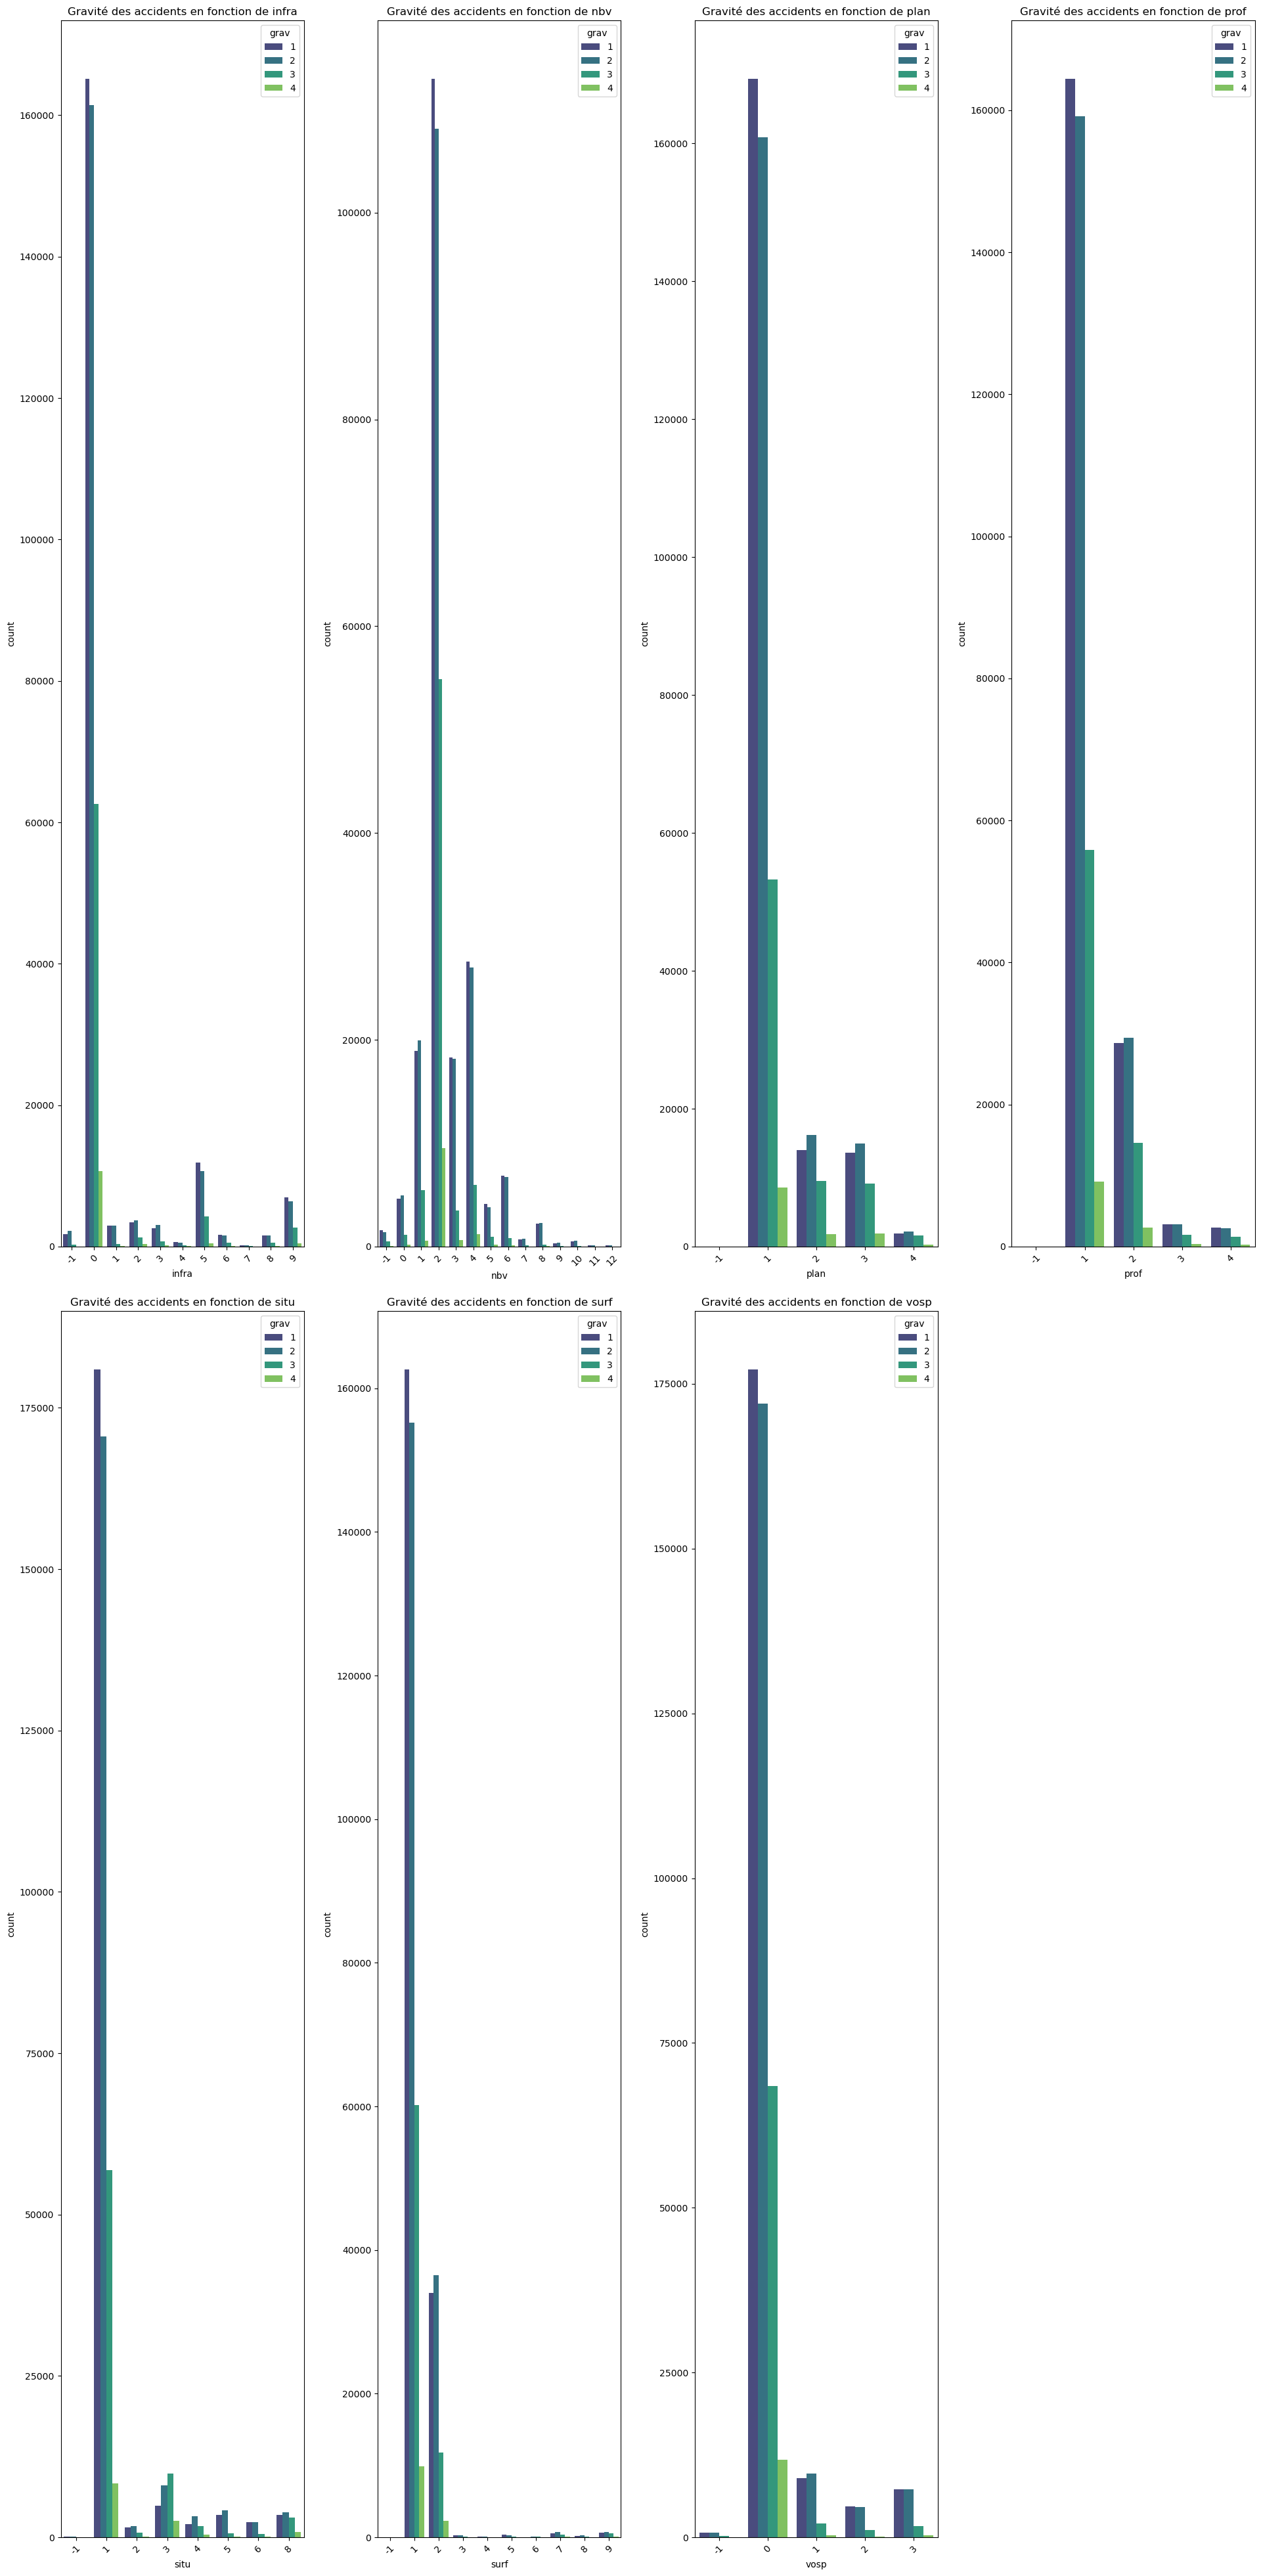

In [14]:
columns = df.columns[21:30].difference(['grav', 'mois', 'an', 'jour', 'lat', 'long','pr','pr1'])

# Nombre de colonnes à tracer
num_columns = len(columns)

# Création de la figure avec des subplots
fig, axs = plt.subplots(nrows=(num_columns // 4) + 1, ncols=4, figsize=(20, 40))
fig.tight_layout(pad=5.0)
axs = axs.ravel()


# Boucle pour tracer les graphiques
for i, col in enumerate(columns):
    if col=='an_nais':
        sns.countplot(data=df1.sort_values(by=['jour', 'mois']), x=col, hue='grav', ax=axs[i], palette='viridis')
        axs[i].tick_params(axis='x', rotation=90)
        axs[i].set_title(f'Gravité des accidents en fonction de {col}', fontsize=12)
    else:
        sns.countplot(data=df.sort_values(by=['jour', 'mois']), x=col, hue='grav', ax=axs[i], palette='viridis')
        axs[i].tick_params(axis='x', rotation=45)
        axs[i].set_title(f'Gravité des accidents en fonction de {col}', fontsize=12)
        
# Supprimer les axes inutilisés si le nombre de colonnes n'est pas multiple de 4
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.show()

##### Quelques interprétations

Gravité des accidents en fonction de l'infra (Aménagement - Infrastructure) : Les accidents graves surviennent principalement sur des routes sans aménagement particulier (infra 0). 

Gravité des accidents en fonction du nbv (Nombre total de voies de circulation) : Les accidents graves se produisent principalement sur des routes à deux voies (nbv 2) et quatres  voies (nbv 4), ce qui indique que la densité de trafic joue un rôle dans la gravité des accidents.

Gravité des accidents en fonction du plan (Tracé en plan) : La majorité des accidents graves se produisent sur des routes rectilignes (plan 1). Les courbes à droite (plan 3) et à gauche (plan 2) montrent également des taux significatifs de gravité.

Gravité des accidents en fonction du prof (Profil en long) : Les accidents graves se produisent principalement sur des routes plates (prof 1). Les pentes (prof 2) et les sommets de côte (prof 3) présentent également des niveaux significatifs de gravité.

Gravité des accidents en fonction du situ (Situation de l’accident) : La majorité des accidents graves se produisent sur la chaussée (situ 1). Les trottoirs (situ 4) et les pistes cyclables (situ 5) montrent également des niveaux de gravité notables.

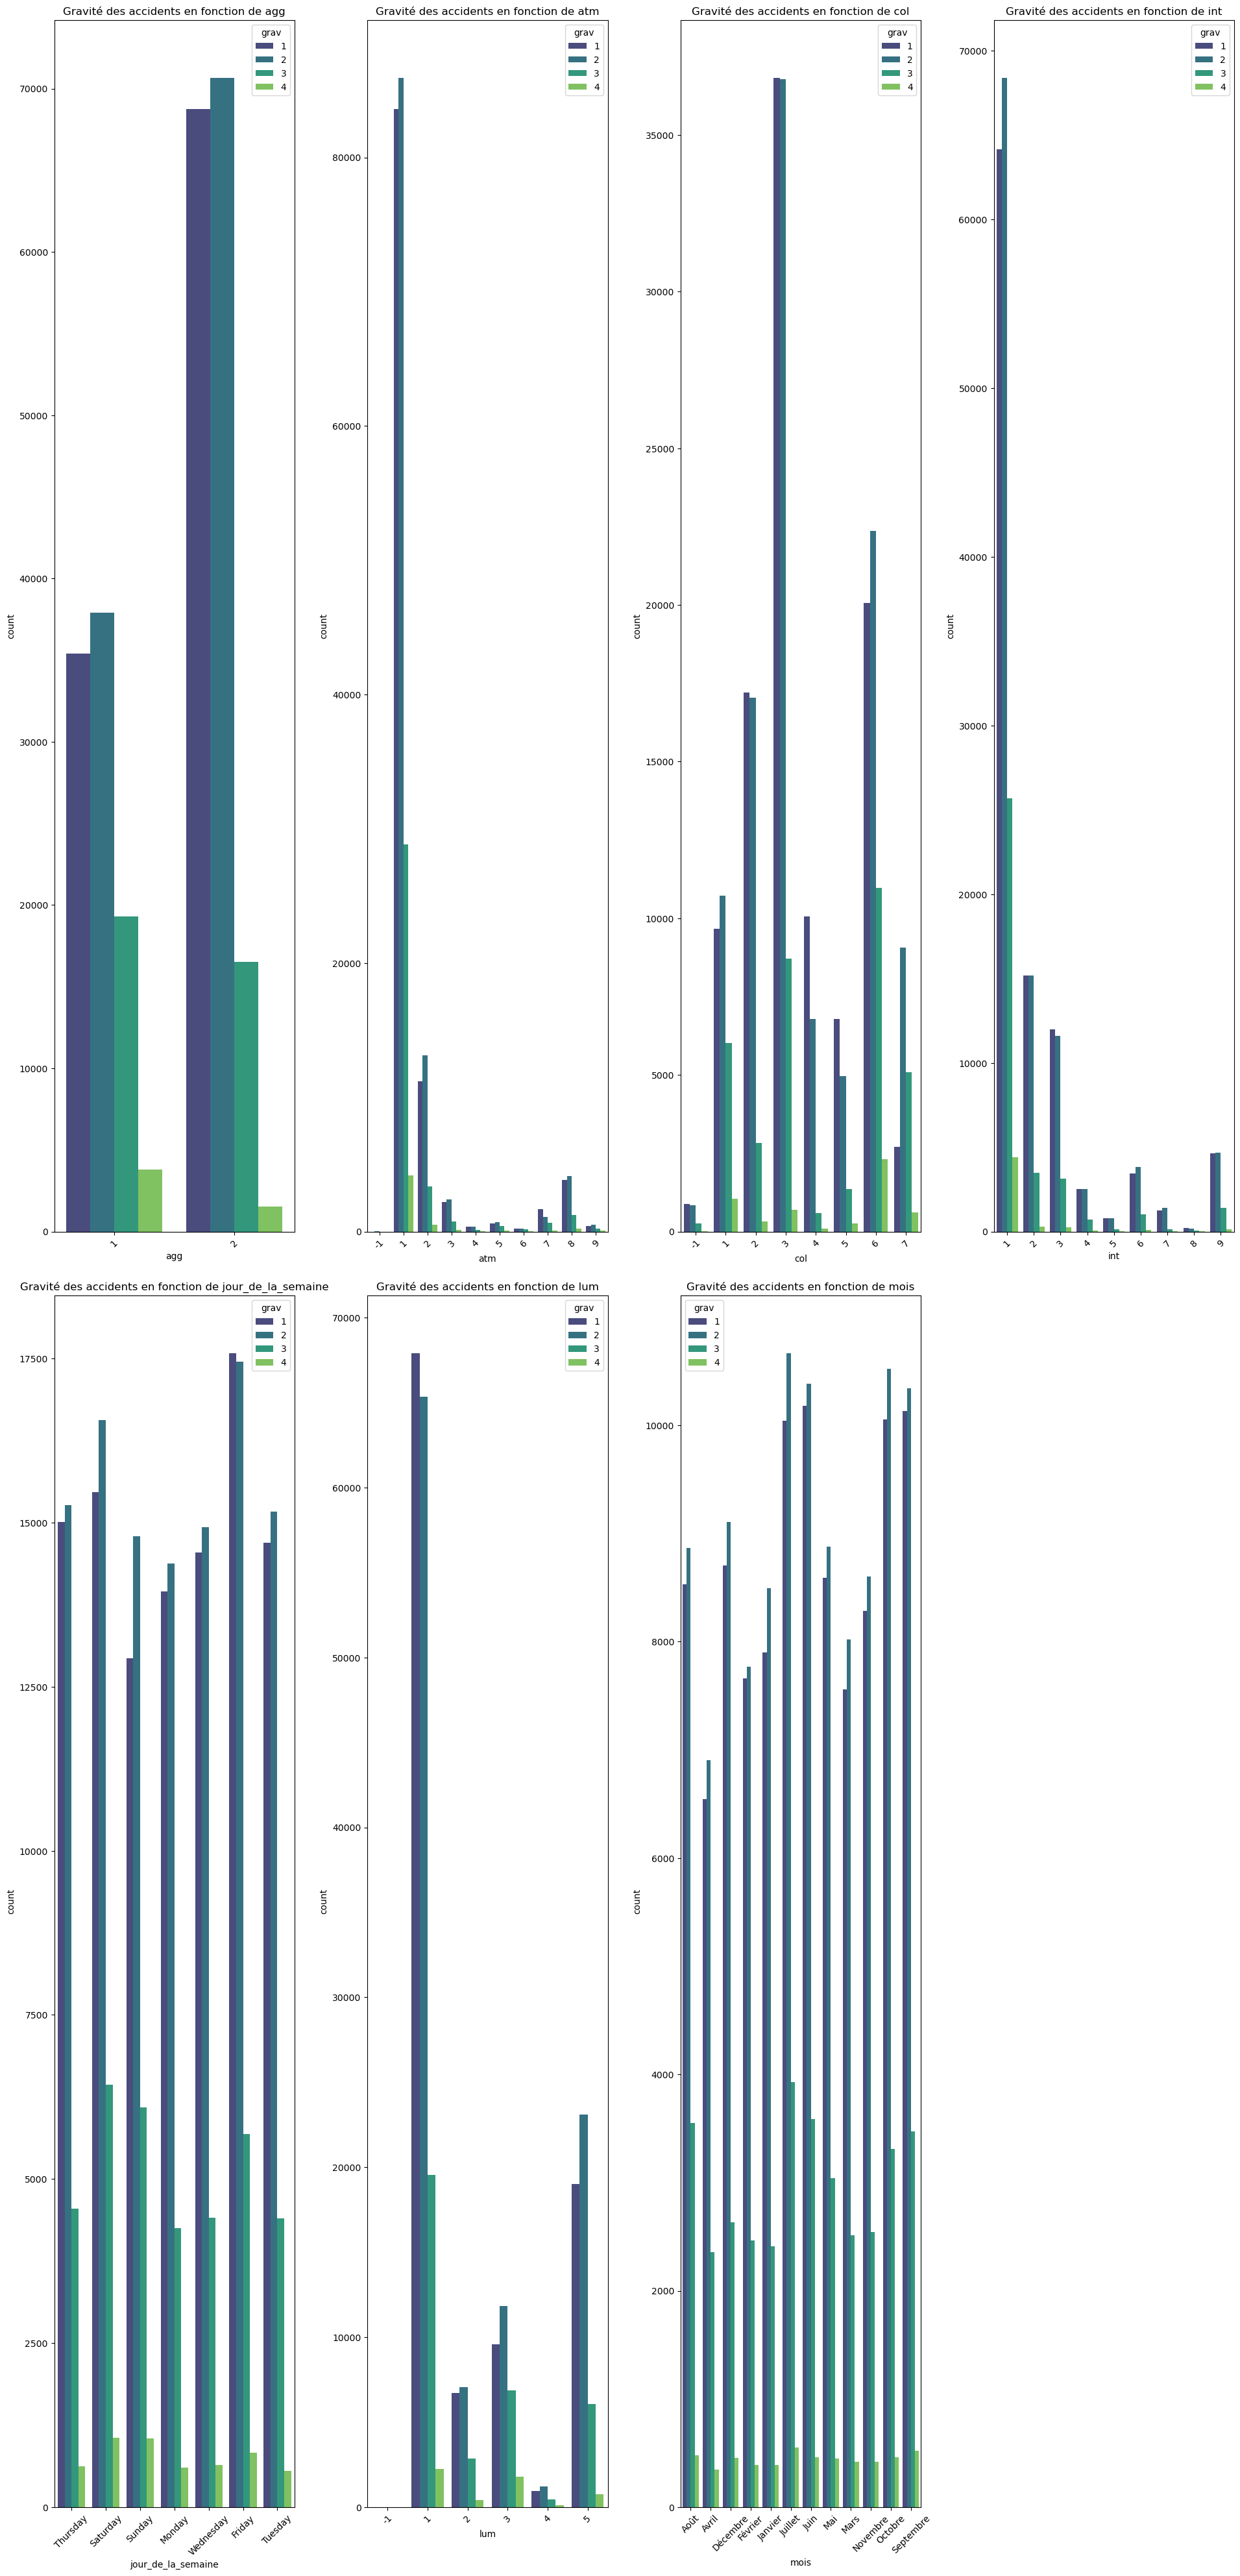

In [18]:
columns = df1.columns[31:49].difference(['grav','dep', 'an', 'jour', 'lat', 'long','pr','pr1','hrmn','com','hrmn_radians','heure_sin','heure_cos','date'])

# Nombre de colonnes à tracer
num_columns = len(columns)

# Création de la figure avec des subplots
fig, axs = plt.subplots(nrows=(num_columns // 4) + 1, ncols=4, figsize=(20, 40))
fig.tight_layout(pad=5.0)
axs = axs.ravel()


# Boucle pour tracer les graphiques
for i, col in enumerate(columns):
        sns.countplot(data=df1.sort_values(by=['jour', 'mois']), x=col, hue='grav', ax=axs[i], palette='viridis')
        axs[i].tick_params(axis='x', rotation=45)
        axs[i].set_title(f'Gravité des accidents en fonction de {col}', fontsize=12)
        
# Supprimer les axes inutilisés si le nombre de colonnes n'est pas multiple de 4
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.show()

Tableau de contigence, nombre d'accident par jour de la semaine en focntion de la gravité de l'accident

In [16]:

# Assurez-vous que les jours de la semaine sont en anglais et dans le bon ordre
jours_de_la_semaine = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Créer le tableau de contingence
contingence_table = pd.crosstab(df1['jour_de_la_semaine'], df1['grav'])

# Trier le tableau par jour de la semaine
contingence_table = contingence_table.reindex(jours_de_la_semaine)


# Appliquer un style
styled_table = contingence_table.style.background_gradient(cmap='viridis').set_caption("Tableau de contingence : Jour de la semaine par gravité")

# Afficher le tableau stylisé
styled_table


grav,1,2,3,4
jour_de_la_semaine,,,,
Monday,13948,14377,4249,601
Tuesday,14691,15172,4401,550
Wednesday,14547,14932,4405,644
Thursday,15011,15269,4543,625
Friday,17581,17454,5689,827
Saturday,15470,16564,6439,1052
Sunday,12934,14789,6094,1043


In [17]:
import pandas as pd

# Assurez-vous que les mois sont en français et dans le bon ordre
mois_de_l_annee = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", 
                   "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"]

# Créer le tableau de contingence
contingence_table = pd.crosstab(df1['mois'], df1['grav'])

# Trier le tableau par ordre des mois
contingence_table = contingence_table.reindex(mois_de_l_annee)

# Appliquer un style
styled_table = contingence_table.style.background_gradient(cmap='viridis').set_caption("Tableau de contingence : gravité des accidents par mois")

# Afficher le tableau stylisé
styled_table

grav,1,2,3,4
mois,,,,
Janvier,7903,8494,2414,388
Février,7660,7767,2467,389
Mars,7560,8021,2514,421
Avril,6546,6907,2356,348
Mai,8592,8879,3040,450
Juin,10179,10383,3588,462
Juillet,10040,10666,3928,552
Août,8529,8864,3549,480
Septembre,10133,10345,3470,521


Cette études statistiques de la variation de certaines variables par classe de gravité, nous montre aussi que toutes les variables n'ont pas la même sensibilité de variation par rapport à la variable gravité. Ce qui montre que toutes les variables ne sont pas le même niveau de corrélation avec la variable gravité.


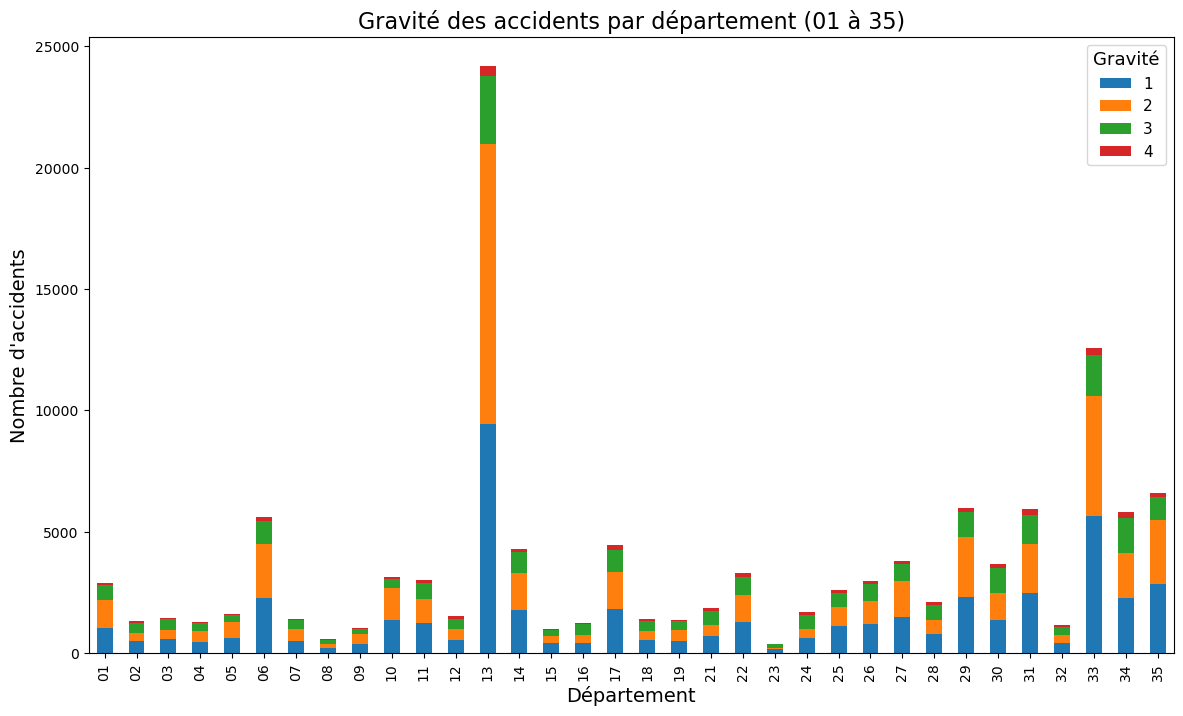

In [22]:
# Filtrer les départements entre 01 et 35
departments = [str(i).zfill(2) for i in range(1, 36)]
df_filtered = df[df['dep'].isin(departments)]

# Agréger les données par département et gravité
agg_data = df_filtered.groupby(['dep', 'grav']).size().unstack(fill_value=0)

# Tracer les données
fig, ax = plt.subplots(figsize=(14, 8))

# Tracer chaque catégorie de gravité
agg_data.plot(kind='bar', stacked=True, ax=ax)

# Ajouter des titres et des labels
ax.set_title('Gravité des accidents par département (01 à 35)', fontsize=16)
ax.set_xlabel('Département', fontsize=14)
ax.set_ylabel('Nombre d\'accidents', fontsize=14)
ax.legend(title='Gravité', title_fontsize='13', fontsize='11')

# Rotation des labels de l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()

Les départements avec les plus grandes villes (comme Marseille dans les Bouches-du-Rhône, Bordeaux dans la Gironde et Nice dans les Alpes-Maritimes) montrent des taux d'accidents élevés, souvent avec une majorité de blessés légers. Cela peut être dû à une densité de trafic plus élevée et à une infrastructure routière plus complexe dans ces zones urbaines.

### 3.3 Corrélations

##### Entre les variables continues(corrélation de pearson)

In [26]:
df = pd.read_csv('stats_data.csv', sep=",")


# Fonction pour encoder par fréquence d'apparition
def frequency_encoding(df, variable):
    # Compter les fréquences des catégories
    freq_encoding = df[variable].value_counts()
    # Mapper les fréquences à la variable d'origine
    df[variable] = df[variable].map(freq_encoding)
    return df


df=frequency_encoding(df, 'dep')
df=frequency_encoding(df, 'com')

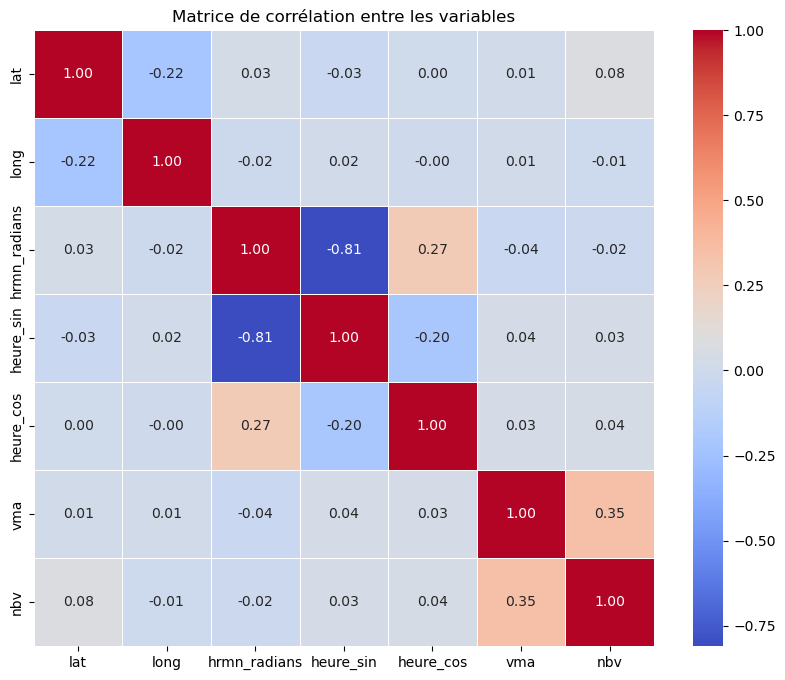

In [27]:
# Sélection des variables d'intérêt
variables = ['lat', 'long', 'hrmn_radians', 'heure_sin', 'heure_cos', 'vma', 'nbv']

# Création d'une sous-dataframe avec les variables sélectionnées
df_variables = df[variables]

# Calcul de la matrice de corrélation
corr_matrix = df_variables.corr()

# Création de la heatmap stylée avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation entre les variables")
plt.show()

Il n'y a pas beaucoup de corrélation significative entre ces variables à part entre les variables 'hrmn_radians' et 'hrmn_sin'
(ce qui n'est pas surprenant car 'hrmn_sin' est le sinus de  'hrmn_radians' )

##### Entre les variables catégorielles 

In [34]:
import pandas as pd
from scipy.stats import chi2_contingency

# Supposons que df soit votre DataFrame avec les données
# Sélection des variables à exclure
variables_to_exclude = ['lat', 'long', 'hrmn_radians', 'heure_sin', 'heure_cos', 'vma', 'nbv']

# Liste pour stocker les résultats
results = []

# Effectuer le test du Chi2 pour chaque paire de variables restantes
for i, var1 in enumerate(variables):
    for var2 in variables[i+1:]:
        if (var1 not in variables_to_exclude) and (var2 not in variables_to_exclude):
        # Créer le tableau de contingence
            contingency_table = pd.crosstab(df[var1], df[var2])
        # Effectuer le test du Chi2
            chi2, p, dof, ex = chi2_contingency(contingency_table)
        # Stocker les résultats
            results.append({'Variable 1': var1, 'Variable 2': var2, 'Chi2': chi2, 'p-value': p})

# Convertir les résultats en DataFrame pour une meilleure lisibilité
results_df = pd.DataFrame(results)

In [36]:
results_df

,Variable 1,Variable 2,Chi2,p-value
0,place,catu,949709.066127,0.000000e+00
1,place,grav,29321.770561,0.000000e+00
2,place,sexe,24196.349289,0.000000e+00
3,place,an_nais,143692.875624,0.000000e+00
4,place,trajet,37344.408965,0.000000e+00
...,...,...,...,...
775,agg,atm,2686.797636,0.000000e+00
776,agg,col,42894.314095,0.000000e+00
777,int,atm,1519.428711,7.748742e-270
778,int,col,80620.078492,0.000000e+00


Liste des seules variables qui ne sont pas corrélées 

In [39]:
results_df[results_df['p-value']>0.05]

,Variable 1,Variable 2,Chi2,p-value
103,grav,jour,112.937327,0.051389
132,sexe,prof,3.967194,0.860071
133,sexe,pr,921.774528,1.000000
139,sexe,jour,55.276681,0.648669
146,sexe,agg,4.735537,0.093690


La plupart de toutes les variables catégorielles sont corrélés avec au moins une autre variables catégorielles.

#### Géostatistique 

In [ ]:
#utilisation du framework géopandas pour créer des points de cordonnées gps à partir de la longitude et latitude.
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)


###### Fonction permettant de générer des carte en html

In [ ]:
from folium import GeoJsonTooltip, Marker, Icon, TileLayer
import folium
import branca.colormap as cm

def generate_filtered_map(df: gpd.GeoDataFrame):
    latitude_moyenne = df.geometry.y.mean()
    longitude_moyenne = df.geometry.x.mean()

    m = folium.Map(location=[latitude_moyenne, longitude_moyenne], zoom_start=5, control_scale=True,
                   tiles="cartodbpositron")

    folium.TileLayer(
        tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}/{x}', attr=(
            '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> '
            'contributors, &copy; <a href="https://opentopomap.org/attributions">OpenTopoMap</a>'
        ), name="Forêts & Reliefs").add_to(m)

    colors = {
        1: "green",
        2: "blue",
        3: "orange",
        4: "red"
    }

    legend_labels = {
        1: "Indemne",
        2: "Blessé léger",
        3: "Blessé grave",
        4: "Tué"
    }

    # Créer la légende
    legend_html = '''
    <div style="position: fixed; 
                 top: 10px; left: 40px; width: 170px; height: 120px; 
                 border:2px solid grey; z-index:9999; font-size:14px;
                 ">&nbsp; <b> Niveau de gravité des accidents </b> <br>
                 &nbsp; 1 - Indemne &nbsp; <svg width="20" height="20"><rect width="20" height="20" style="fill:green;stroke-width:1;stroke:rgb(0,0,0)" /></svg><br>
                 &nbsp; 2 - Blessé léger &nbsp; <svg width="20" height="20"><rect width="20" height="20" style="fill:blue;stroke-width:1;stroke:rgb(0,0,0)" /></svg><br>
                 &nbsp; 3 - Blessé grave &nbsp; <svg width="20" height="20"><rect width="20" height="20" style="fill:orange;stroke-width:1;stroke:rgb(0,0,0)" /></svg><br>
                 &nbsp; 4 - Tué &nbsp; <svg width="20" height="20"><rect width="20" height="20" style="fill:red;stroke-width:1;stroke:rgb(0,0,0)" /></svg>
      </div>
    '''

    m.get_root().html.add_child(folium.Element(legend_html))

    for _, r in df.iterrows():
        longitude, latitude = r.geometry.x, r.geometry.y

        circle_color = colors.get(r.grav, "rgba(0, 0, 0, 1)") 

        folium.Circle(
            location=[latitude, longitude],
            radius=5,  # Rayon du cercle en mètres
            color=circle_color,  # Couleur de la bordure
            fill=True,
            fill_opacity=0.8
        ).add_to(m)

    return m

In [ ]:
m = generate_filtered_map(gdf[:10000])
m.save("carte_gravite6.html")